<center>
    
# TP2 : Customer Segmentation

<img src="https://bossdata.be/wp-content/uploads/2019/06/Group-2blogrfm.png" width="850">

</center>

## Dataset Explanation

The dataset used in this lab contains **customer-related attributes**. Below is an overview of each column and its meaning:

<div align="center">
Features description

| Feature            | Type     | Description                                                        |
|--------------------|----------|--------------------------------------------------------------------|
| ID                 | Numeric  | Customer's unique identifier                                       |
| Year_Birth         | Numeric  | Customer's birth year                                              |
| Education          | Categorical | Customer's education level                                       |
| Marital_Status     | Categorical | Customer's marital status                                        |
| Income             | Numeric  | Customer's yearly household income                                 |
| Kidhome            | Numeric  | Number of children in customer's household                         |
| Teenhome           | Numeric  | Number of teenagers in customer's household                        |
| Dt_Customer        | DateTime | Date of customer's enrollment with the company                     |
| Recency            | Numeric  | Number of days since customer's last purchase                      |
| MntWines           | Numeric  | Amount spent on wine in last 2 years                               |
| MntFruits          | Numeric  | Amount spent on fruits in last 2 years                             |
| MntMeatProducts    | Numeric  | Amount spent on meat in last 2 years                               |
| MntFishProducts    | Numeric  | Amount spent on fish in last 2 years                               |
| MntSweetProducts   | Numeric  | Amount spent on sweets in last 2 years                             |
| MntGoldProds       | Numeric  | Amount spent on gold in last 2 years                               |
| NumDealsPurchases  | Numeric  | Number of purchases made with a discount                           |
| NumWebPurchases    | Numeric  | Number of purchases made through the website                       |
| NumCatalogPurchases| Numeric  | Number of purchases made using a catalogue                         |
| NumStorePurchases  | Numeric  | Number of purchases made directly in stores                        |
| NumWebVisitsMonth  | Numeric  | Number of visits to the website in the last month                  |
| AcceptedCmp1-5     | Numeric  | 1 if offer was accepted in respective campaign, 0 otherwise        |
| Response           | Numeric  | 1 if customer accepted the offer in the last campaign, 0 otherwise |
| Complain           | Numeric  | 1 if the customer complained in the last 2 years, 0 otherwise      |
</div>

**Note**: You may not use all columns in clustering, but these definitions help you understand your data.


### 1. Load and inspect the data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer



In [177]:
data = pd.read_csv("/kaggle/input/customers8/customers.csv", sep='\t')
display(data.head())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [140]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [178]:
a = data.describe()
display(a)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### 2. Handle date column. Create a new column called Customer_Tenure that represents how long each customer has been with the company (in days) relative to the most recent date in the dataset.

In [179]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')
most_recent_date = data['Dt_Customer'].max()
data['Customer_Tenure'] = (most_recent_date - data['Dt_Customer']).dt.days
print(data[['ID', 'Dt_Customer', 'Customer_Tenure']])

         ID Dt_Customer  Customer_Tenure
0      5524  2012-09-04              663
1      2174  2014-03-08              113
2      4141  2013-08-21              312
3      6182  2014-02-10              139
4      5324  2014-01-19              161
...     ...         ...              ...
2235  10870  2013-06-13              381
2236   4001  2014-06-10               19
2237   7270  2014-01-25              155
2238   8235  2014-01-24              156
2239   9405  2012-10-15              622

[2240 rows x 3 columns]


### 3. CHECK/ADDRESS MISSING VALUES using K-Nearest Neighbors (KNN) Imputation

In [180]:
print(data.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Customer_Tenure         0
dtype: int64



=== Missing Values Before ===
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Customer_Tenure         0
dtype: int64


In [181]:
# Select columns for KNN imputation
numerical_cols = data.select_dtypes(include=["float64", "int64"]).columns
knn_imputer = KNNImputer(n_neighbors=5)
data[numerical_cols] = knn_imputer.fit_transform(data[numerical_cols])

In [182]:
print(data.isnull().sum())

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Customer_Tenure        0
dtype: int64


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Customer_Tenure        0
dtype: int64


In [183]:
print(data["Income"].describe())

count      2240.000000
mean      52208.151875
std       25111.548264
min        1730.000000
25%       35303.000000
50%       51342.000000
75%       68468.250000
max      666666.000000
Name: Income, dtype: float64


,Income
count,2240.000000
mean,52247.251354
std,25037.797168
min,1730.000000
25%,35538.750000
50%,51741.500000
75%,68289.750000
max,666666.000000


# Univariate Analysis :

### 2.Analysis On Year_Birth

In [184]:
year_birth_counts = data["Year_Birth"].value_counts()
year_birth_counts_desc = year_birth_counts.sort_values(ascending=False)
print("unique categories present in the Year_Birth:\n")
print(year_birth_counts_desc)

unique categories present in the Year_Birth:

Year_Birth
1976.0    89
1971.0    87
1975.0    83
1972.0    79
1978.0    77
1970.0    77
1973.0    74
1965.0    74
1969.0    71
1974.0    69
1956.0    55
1958.0    53
1979.0    53
1977.0    52
1952.0    52
1959.0    51
1968.0    51
1966.0    50
1954.0    50
1955.0    49
1960.0    49
1982.0    45
1963.0    45
1967.0    44
1962.0    44
1957.0    43
1951.0    43
1986.0    42
1964.0    42
1983.0    42
1980.0    39
1981.0    39
1984.0    38
1961.0    36
1953.0    35
1985.0    32
1989.0    30
1949.0    30
1950.0    29
1988.0    29
1987.0    27
1948.0    21
1990.0    18
1947.0    16
1946.0    16
1991.0    15
1992.0    13
1945.0     8
1943.0     7
1944.0     7
1993.0     5
1995.0     5
1994.0     3
1996.0     2
1899.0     1
1941.0     1
1893.0     1
1900.0     1
1940.0     1
Name: count, dtype: int64


In [ ]:
#CHECK THE NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "Year_Birth"


Unique categories present in the Year_Birth:
 Year_Birth
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: count, dtype: int64


In [185]:
# Add a column for the age
current_year = 2025
data["Age"] = current_year - data["Year_Birth"]
print(data[["Year_Birth", "Age"]].head())

   Year_Birth   Age
0      1957.0  68.0
1      1954.0  71.0
2      1965.0  60.0
3      1984.0  41.0
4      1981.0  44.0


### 2.Analysis On Education Variable.

In [186]:
unique_education = data["Education"].unique()
unique_education

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [188]:
#CHANGE CATEGORIES INTO "Under Graduate" if 'Basic'  AND "Post Graduate" ELSE
data["Education"] = data["Education"].replace({"Basic": "Under Graduate"})
data["Education"] = data["Education"].apply(lambda x: "Post Graduate" if x != "Under Graduate" else x)
print(data["Education"].unique())

['Post Graduate' 'Under Graduate']


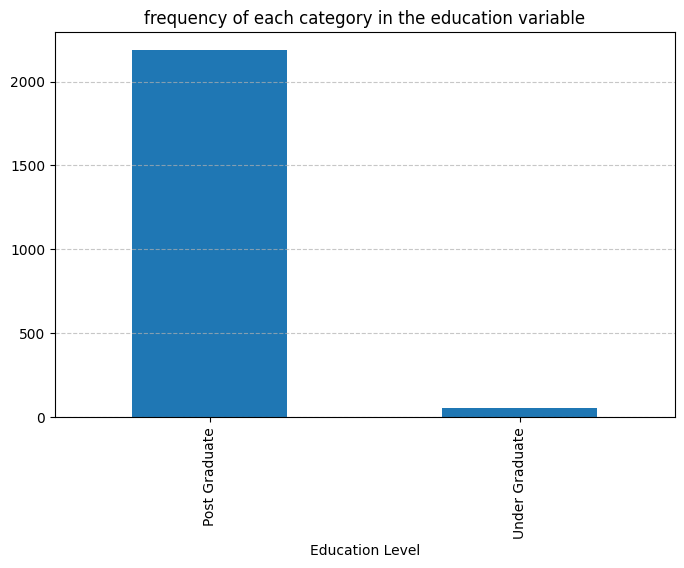

In [189]:
education_counts = data["Education"].value_counts()
plt.figure(figsize=(8,5))
education_counts.plot(kind='bar')
plt.xlabel("Education Level")
plt.title("frequency of each category in the education variable")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 800x800 with 0 Axes>

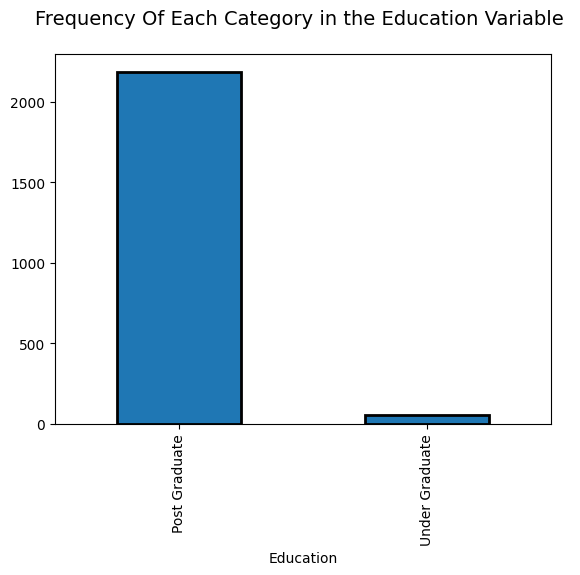

<Figure size 800x800 with 0 Axes>

In [ ]:
#VISUALIZING THE "Education"
frequency of each category in the education variable

### 3.Analysis On the variable `Marital_Status`.

- `'Married'`, `'Together'` (to be grouped as `'Relationship'`)
- `'Divorced'`, `'Widow'`, `'Alone'`, `'YOLO'`, `'Absurd'` (to be grouped as `'Single'`)


In [190]:
unique_marital_status = data["Marital_Status"].unique()
unique_marital_status

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [191]:
#REPLACING THE CONFLICT VALUES IN Marital_status..
data["Marital_Status"] = data["Marital_Status"].replace({
    "Married": "Relationship",
    "Together": "Relationship",
    "Divorced": "Single",
    "Widow": "Single",
    "Alone": "Single",
    "YOLO": "Single",
    "Absurd": "Single"
})

data["Marital_Status"].unique()

array(['Single', 'Relationship'], dtype=object)

In [21]:
data['Marital_Status'].unique()

array(['Single', 'Relationship'], dtype=object)

### 4. Analysis on the variable `Expenses`

Create a column `Expenses` equal to the sum of the columns `MntWines` , `MntFruits` , `MntMeatProducts` ,  `MntFishProducts` , `MntSweetProducts`  and `MntGoldProds`. And drop them.

In [192]:
# Combining different features into a single column 
data["Education_Marital"] = data["Education"] + " - " + data["Marital_Status"]
print(data[["Education", "Marital_Status", "Education_Marital"]].head())

       Education Marital_Status             Education_Marital
0  Post Graduate         Single        Post Graduate - Single
1  Post Graduate         Single        Post Graduate - Single
2  Post Graduate   Relationship  Post Graduate - Relationship
3  Post Graduate   Relationship  Post Graduate - Relationship
4  Post Graduate   Relationship  Post Graduate - Relationship


In [193]:
columns_to_drop = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data['Expenses'] = data[columns_to_drop].sum(axis=1)
# Dropping the specified columns
existing_columns = [col for col in columns_to_drop if col in data.columns]
data.drop(columns=existing_columns, inplace=True)
display(data.head())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Tenure,Age,Education_Marital,Expenses
0,5524.0,1957.0,Post Graduate,Single,58138.0,0.0,0.0,2012-09-04,58.0,3.0,...,0.0,0.0,0.0,3.0,11.0,1.0,663.0,68.0,Post Graduate - Single,1617.0
1,2174.0,1954.0,Post Graduate,Single,46344.0,1.0,1.0,2014-03-08,38.0,2.0,...,0.0,0.0,0.0,3.0,11.0,0.0,113.0,71.0,Post Graduate - Single,27.0
2,4141.0,1965.0,Post Graduate,Relationship,71613.0,0.0,0.0,2013-08-21,26.0,1.0,...,0.0,0.0,0.0,3.0,11.0,0.0,312.0,60.0,Post Graduate - Relationship,776.0
3,6182.0,1984.0,Post Graduate,Relationship,26646.0,1.0,0.0,2014-02-10,26.0,2.0,...,0.0,0.0,0.0,3.0,11.0,0.0,139.0,41.0,Post Graduate - Relationship,53.0
4,5324.0,1981.0,Post Graduate,Relationship,58293.0,1.0,0.0,2014-01-19,94.0,5.0,...,0.0,0.0,0.0,3.0,11.0,0.0,161.0,44.0,Post Graduate - Relationship,422.0


In [ ]:
columns_to_drop = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Dropping the specified columns


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Tenure,Age,Expenses
0,5524,1957,Post Graduate,Single,58138.0,0,0,2012-09-04,58,3,8,10,4,7,0,0,0,0,0,0,3,11,1,663,57,1617
1,2174,1954,Post Graduate,Single,46344.0,1,1,2014-03-08,38,2,1,1,2,5,0,0,0,0,0,0,3,11,0,113,60,27
2,4141,1965,Post Graduate,Relationship,71613.0,0,0,2013-08-21,26,1,8,2,10,4,0,0,0,0,0,0,3,11,0,312,49,776
3,6182,1984,Post Graduate,Relationship,26646.0,1,0,2014-02-10,26,2,2,0,4,6,0,0,0,0,0,0,3,11,0,139,30,53
4,5324,1981,Post Graduate,Relationship,58293.0,1,0,2014-01-19,94,5,5,3,6,5,0,0,0,0,0,0,3,11,0,161,33,422


In [154]:
import matplotlib.pyplot as plt 
import seaborn as sns 

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


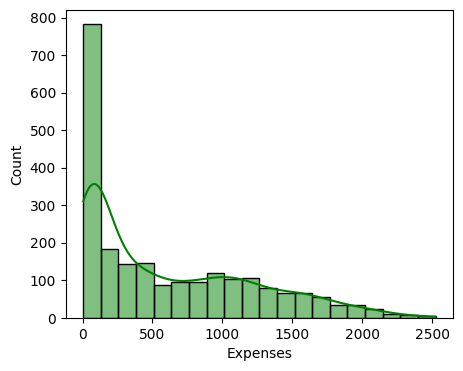

In [155]:
plt.figure(figsize=(5, 4)) 
sns.histplot(data['Expenses'], kde=True, color='green', bins=20) 
plt.xlabel('Expenses') 
plt.ylabel('Count') 
plt.show() 

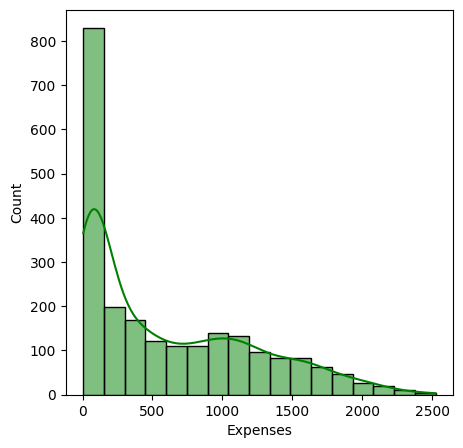

### 5.Analysis On the variables `Kidhome` and `Teenhome`.

In [156]:
data["Kidhome"].astype(int).unique()

array([0, 1, 2])

array([0, 1, 2])

In [157]:
data["Teenhome"].astype(int).unique()

array([0, 1, 2])

array([0, 1, 2])

In [194]:
# Combine both to create a new column kids then drop them
data["kids"] = data["Kidhome"] + data["Teenhome"]
display(data.head())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Tenure,Age,Education_Marital,Expenses,kids
0,5524.0,1957.0,Post Graduate,Single,58138.0,0.0,0.0,2012-09-04,58.0,3.0,...,0.0,0.0,3.0,11.0,1.0,663.0,68.0,Post Graduate - Single,1617.0,0.0
1,2174.0,1954.0,Post Graduate,Single,46344.0,1.0,1.0,2014-03-08,38.0,2.0,...,0.0,0.0,3.0,11.0,0.0,113.0,71.0,Post Graduate - Single,27.0,2.0
2,4141.0,1965.0,Post Graduate,Relationship,71613.0,0.0,0.0,2013-08-21,26.0,1.0,...,0.0,0.0,3.0,11.0,0.0,312.0,60.0,Post Graduate - Relationship,776.0,0.0
3,6182.0,1984.0,Post Graduate,Relationship,26646.0,1.0,0.0,2014-02-10,26.0,2.0,...,0.0,0.0,3.0,11.0,0.0,139.0,41.0,Post Graduate - Relationship,53.0,1.0
4,5324.0,1981.0,Post Graduate,Relationship,58293.0,1.0,0.0,2014-01-19,94.0,5.0,...,0.0,0.0,3.0,11.0,0.0,161.0,44.0,Post Graduate - Relationship,422.0,1.0


In [159]:
print("Unique categories present in the Kids:\n",data['kids'].value_counts())

Unique categories present in the Kids:
 kids
1.0    1128
0.0     638
2.0     421
3.0      53
Name: count, dtype: int64


In [195]:
columns_to_drop = ['Kidhome', 'Teenhome']

# Dropping the specified columns
data.drop(columns=columns_to_drop, inplace=True)
display(data.head())

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Tenure,Age,Education_Marital,Expenses,kids
0,5524.0,1957.0,Post Graduate,Single,58138.0,2012-09-04,58.0,3.0,8.0,10.0,...,0.0,0.0,3.0,11.0,1.0,663.0,68.0,Post Graduate - Single,1617.0,0.0
1,2174.0,1954.0,Post Graduate,Single,46344.0,2014-03-08,38.0,2.0,1.0,1.0,...,0.0,0.0,3.0,11.0,0.0,113.0,71.0,Post Graduate - Single,27.0,2.0
2,4141.0,1965.0,Post Graduate,Relationship,71613.0,2013-08-21,26.0,1.0,8.0,2.0,...,0.0,0.0,3.0,11.0,0.0,312.0,60.0,Post Graduate - Relationship,776.0,0.0
3,6182.0,1984.0,Post Graduate,Relationship,26646.0,2014-02-10,26.0,2.0,2.0,0.0,...,0.0,0.0,3.0,11.0,0.0,139.0,41.0,Post Graduate - Relationship,53.0,1.0
4,5324.0,1981.0,Post Graduate,Relationship,58293.0,2014-01-19,94.0,5.0,5.0,3.0,...,0.0,0.0,3.0,11.0,0.0,161.0,44.0,Post Graduate - Relationship,422.0,1.0


### 6. Analysis on Purchases. Create a column `NumTotalPurchases` .
Drop columns used for creation and drop `Z_CostContact`, `Z_Revenue` as well

In [196]:
# combine "NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases" to create "NumTotalPurchases". 
data["NumTotalPurchases"] = (data["NumWebPurchases"] + data["NumCatalogPurchases"] + data["NumStorePurchases"] + data["NumDealsPurchases"])
display(data.head())

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,Complain,Z_CostContact,Z_Revenue,Response,Customer_Tenure,Age,Education_Marital,Expenses,kids,NumTotalPurchases
0,5524.0,1957.0,Post Graduate,Single,58138.0,2012-09-04,58.0,3.0,8.0,10.0,...,0.0,3.0,11.0,1.0,663.0,68.0,Post Graduate - Single,1617.0,0.0,25.0
1,2174.0,1954.0,Post Graduate,Single,46344.0,2014-03-08,38.0,2.0,1.0,1.0,...,0.0,3.0,11.0,0.0,113.0,71.0,Post Graduate - Single,27.0,2.0,6.0
2,4141.0,1965.0,Post Graduate,Relationship,71613.0,2013-08-21,26.0,1.0,8.0,2.0,...,0.0,3.0,11.0,0.0,312.0,60.0,Post Graduate - Relationship,776.0,0.0,21.0
3,6182.0,1984.0,Post Graduate,Relationship,26646.0,2014-02-10,26.0,2.0,2.0,0.0,...,0.0,3.0,11.0,0.0,139.0,41.0,Post Graduate - Relationship,53.0,1.0,8.0
4,5324.0,1981.0,Post Graduate,Relationship,58293.0,2014-01-19,94.0,5.0,5.0,3.0,...,0.0,3.0,11.0,0.0,161.0,44.0,Post Graduate - Relationship,422.0,1.0,19.0


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


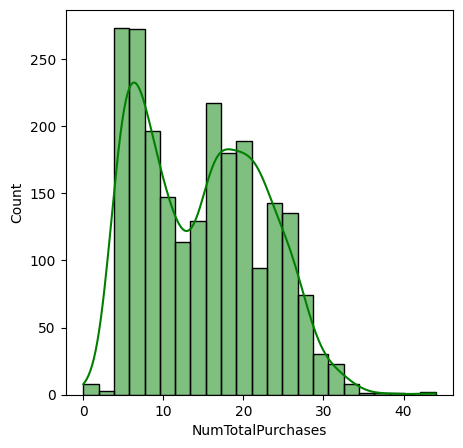

In [162]:
plt.figure(figsize=(5, 5))
sns.histplot(data["NumTotalPurchases"], bins=23, kde=True, color="green", edgecolor="black")
plt.xlabel("NumTotalPurchases")
plt.ylabel("Count")
plt.show()

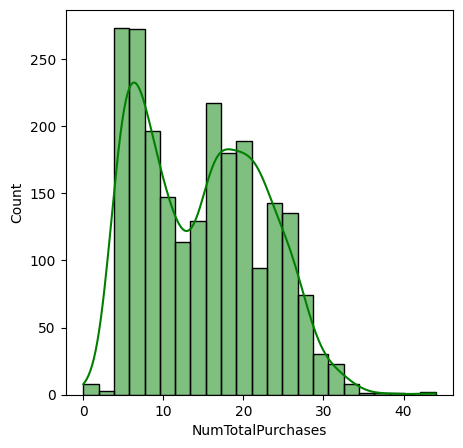

In [197]:
columns_to_drop = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']

# Dropping the specified columns
data = data.drop(columns=columns_to_drop)
display(data.head())

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,...,Complain,Z_CostContact,Z_Revenue,Response,Customer_Tenure,Age,Education_Marital,Expenses,kids,NumTotalPurchases
0,5524.0,1957.0,Post Graduate,Single,58138.0,2012-09-04,58.0,7.0,0.0,0.0,...,0.0,3.0,11.0,1.0,663.0,68.0,Post Graduate - Single,1617.0,0.0,25.0
1,2174.0,1954.0,Post Graduate,Single,46344.0,2014-03-08,38.0,5.0,0.0,0.0,...,0.0,3.0,11.0,0.0,113.0,71.0,Post Graduate - Single,27.0,2.0,6.0
2,4141.0,1965.0,Post Graduate,Relationship,71613.0,2013-08-21,26.0,4.0,0.0,0.0,...,0.0,3.0,11.0,0.0,312.0,60.0,Post Graduate - Relationship,776.0,0.0,21.0
3,6182.0,1984.0,Post Graduate,Relationship,26646.0,2014-02-10,26.0,6.0,0.0,0.0,...,0.0,3.0,11.0,0.0,139.0,41.0,Post Graduate - Relationship,53.0,1.0,8.0
4,5324.0,1981.0,Post Graduate,Relationship,58293.0,2014-01-19,94.0,5.0,0.0,0.0,...,0.0,3.0,11.0,0.0,161.0,44.0,Post Graduate - Relationship,422.0,1.0,19.0


In [198]:
columns_to_drop = ['Z_Revenue', 'Z_CostContact']

# Dropping the specified columns
data = data.drop(columns=columns_to_drop)
display(data.head())

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Tenure,Age,Education_Marital,Expenses,kids,NumTotalPurchases
0,5524.0,1957.0,Post Graduate,Single,58138.0,2012-09-04,58.0,7.0,0.0,0.0,...,0.0,0.0,0.0,1.0,663.0,68.0,Post Graduate - Single,1617.0,0.0,25.0
1,2174.0,1954.0,Post Graduate,Single,46344.0,2014-03-08,38.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,113.0,71.0,Post Graduate - Single,27.0,2.0,6.0
2,4141.0,1965.0,Post Graduate,Relationship,71613.0,2013-08-21,26.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,312.0,60.0,Post Graduate - Relationship,776.0,0.0,21.0
3,6182.0,1984.0,Post Graduate,Relationship,26646.0,2014-02-10,26.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,139.0,41.0,Post Graduate - Relationship,53.0,1.0,8.0
4,5324.0,1981.0,Post Graduate,Relationship,58293.0,2014-01-19,94.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,161.0,44.0,Post Graduate - Relationship,422.0,1.0,19.0


In [30]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Tenure,Age,Expenses,Kids,NumTotalPurchases
0,5524,1957,Post Graduate,Single,58138.0,2012-09-04,58,7,0,0,0,0,0,0,1,663,57,1617,0,25
1,2174,1954,Post Graduate,Single,46344.0,2014-03-08,38,5,0,0,0,0,0,0,0,113,60,27,2,6
2,4141,1965,Post Graduate,Relationship,71613.0,2013-08-21,26,4,0,0,0,0,0,0,0,312,49,776,0,21
3,6182,1984,Post Graduate,Relationship,26646.0,2014-02-10,26,6,0,0,0,0,0,0,0,139,30,53,1,8
4,5324,1981,Post Graduate,Relationship,58293.0,2014-01-19,94,5,0,0,0,0,0,0,0,161,33,422,1,19


### 7. Create a column `Accepted` combining `AcceptedCmp1`..`AcceptedCmp5` and then drop them

In [199]:
data['Accepted'] = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

In [200]:
columns_to_drop = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Dropping the specified columns
data = data.drop(columns=columns_to_drop)
display(data.head())

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,NumWebVisitsMonth,Complain,Response,Customer_Tenure,Age,Education_Marital,Expenses,kids,NumTotalPurchases,Accepted
0,5524.0,1957.0,Post Graduate,Single,58138.0,2012-09-04,58.0,7.0,0.0,1.0,663.0,68.0,Post Graduate - Single,1617.0,0.0,25.0,0.0
1,2174.0,1954.0,Post Graduate,Single,46344.0,2014-03-08,38.0,5.0,0.0,0.0,113.0,71.0,Post Graduate - Single,27.0,2.0,6.0,0.0
2,4141.0,1965.0,Post Graduate,Relationship,71613.0,2013-08-21,26.0,4.0,0.0,0.0,312.0,60.0,Post Graduate - Relationship,776.0,0.0,21.0,0.0
3,6182.0,1984.0,Post Graduate,Relationship,26646.0,2014-02-10,26.0,6.0,0.0,0.0,139.0,41.0,Post Graduate - Relationship,53.0,1.0,8.0,0.0
4,5324.0,1981.0,Post Graduate,Relationship,58293.0,2014-01-19,94.0,5.0,0.0,0.0,161.0,44.0,Post Graduate - Relationship,422.0,1.0,19.0,0.0


In [201]:
x = data.columns
for i in x:
     print(i)

ID
Year_Birth
Education
Marital_Status
Income
Dt_Customer
Recency
NumWebVisitsMonth
Complain
Response
Customer_Tenure
Age
Education_Marital
Expenses
kids
NumTotalPurchases
Accepted


In [35]:
x = df.columns
for i in x:
     print(i)

ID
Year_Birth
Education
Marital_Status
Income
Dt_Customer
Recency
NumWebVisitsMonth
Complain
Response
Customer_Tenure
Age
Expenses
Kids
NumTotalPurchases
Accepted


## Correlation

Focus on the variables : `Kids`,  `Expenses`,  `NumTotalPurchases`,  `Customer_Tenure`,  `Age` and   `Income`

In [202]:
selected_columns = ["kids", "Expenses", "NumTotalPurchases", "Customer_Tenure", "Age", "Income"]

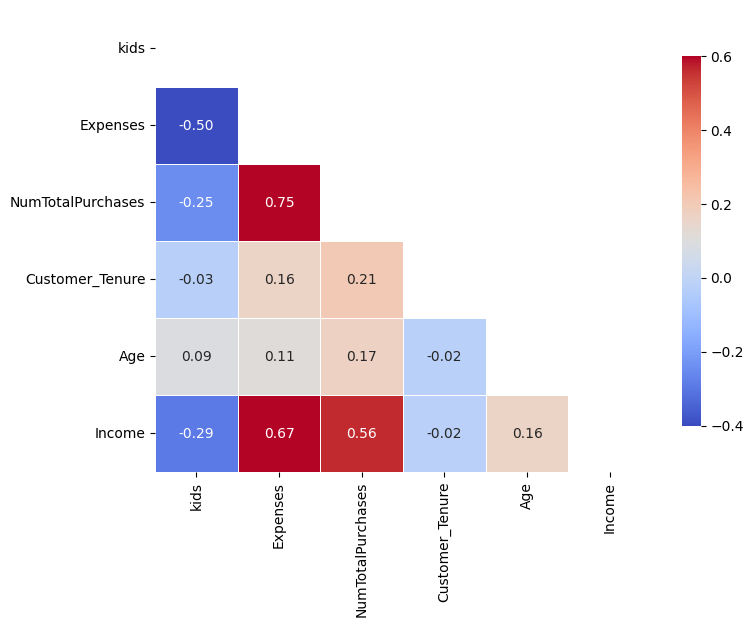

In [203]:
df_corr = data[selected_columns]
correlation_matrix = df_corr.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-0.4, vmax=0.6, cbar_kws={"shrink": 0.8})
plt.show()

<Figure size 600x400 with 0 Axes>

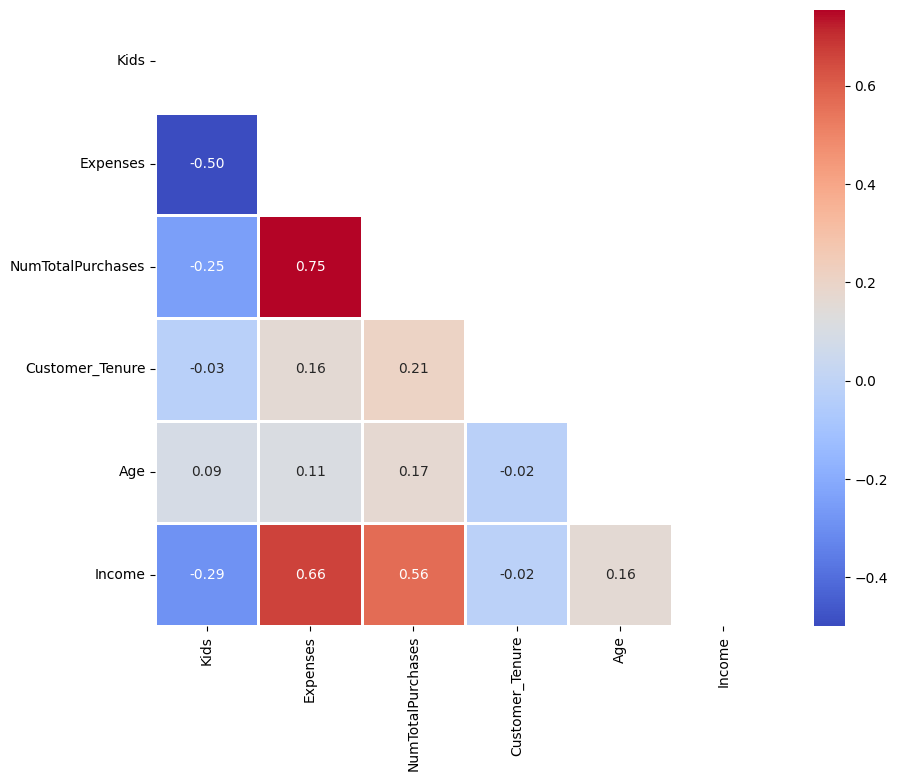

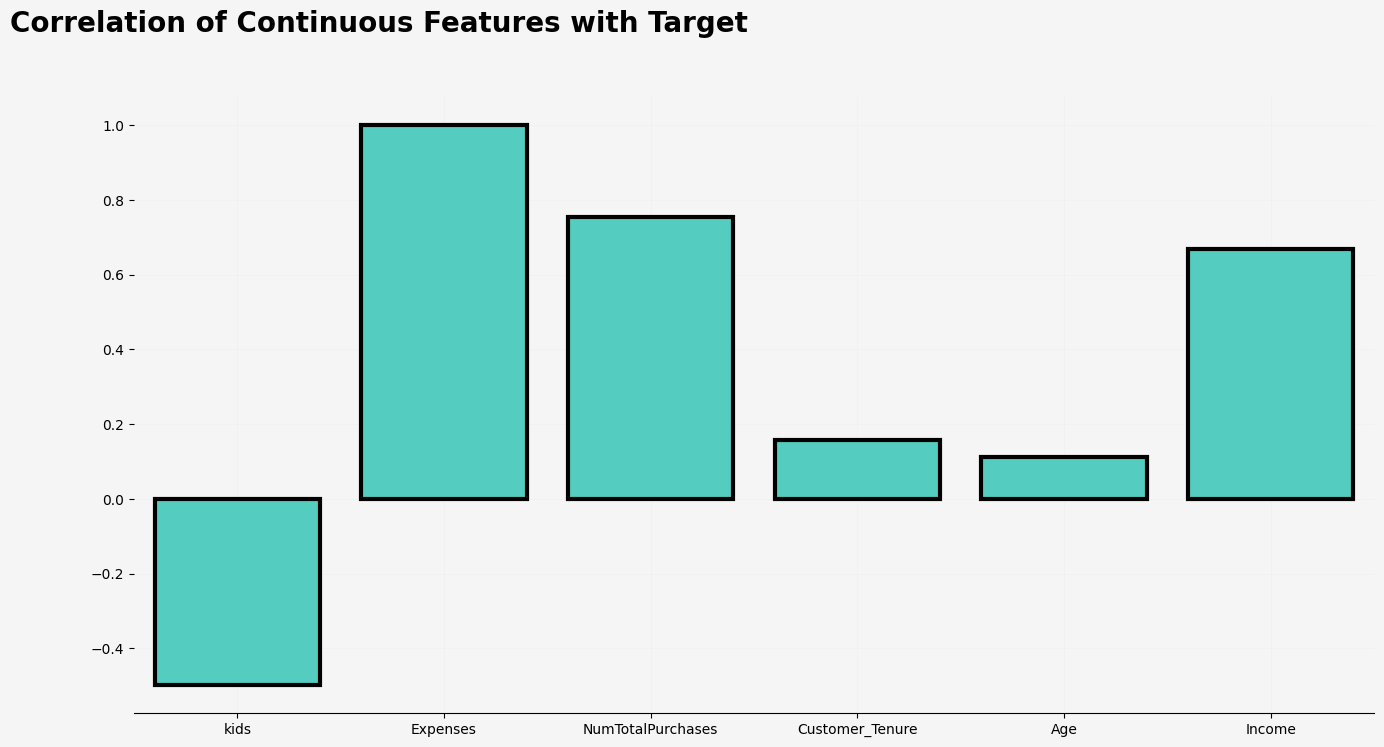

In [204]:
background_color = "#f6f5f5"

fig = plt.figure(figsize=(16, 8), facecolor=background_color)
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])
colors = ["#2f5586", "#f6f5f5","#2f5586"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

ax0.set_facecolor(background_color)
ax0.text(-1.1, 1.25, 'Correlation of Continuous Features with Target', fontsize=20, fontweight='bold')

chart_df = pd.DataFrame(df_corr.corrwith(data['Expenses']))
chart_df.columns = ['corr']
sns.barplot(x=chart_df.index, y=chart_df['corr'], ax=ax0, color='turquoise', zorder=3, edgecolor='black', linewidth=3)
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.set_ylabel('')

for s in ["top","right", 'left']:
    ax0.spines[s].set_visible(False)

plt.show()

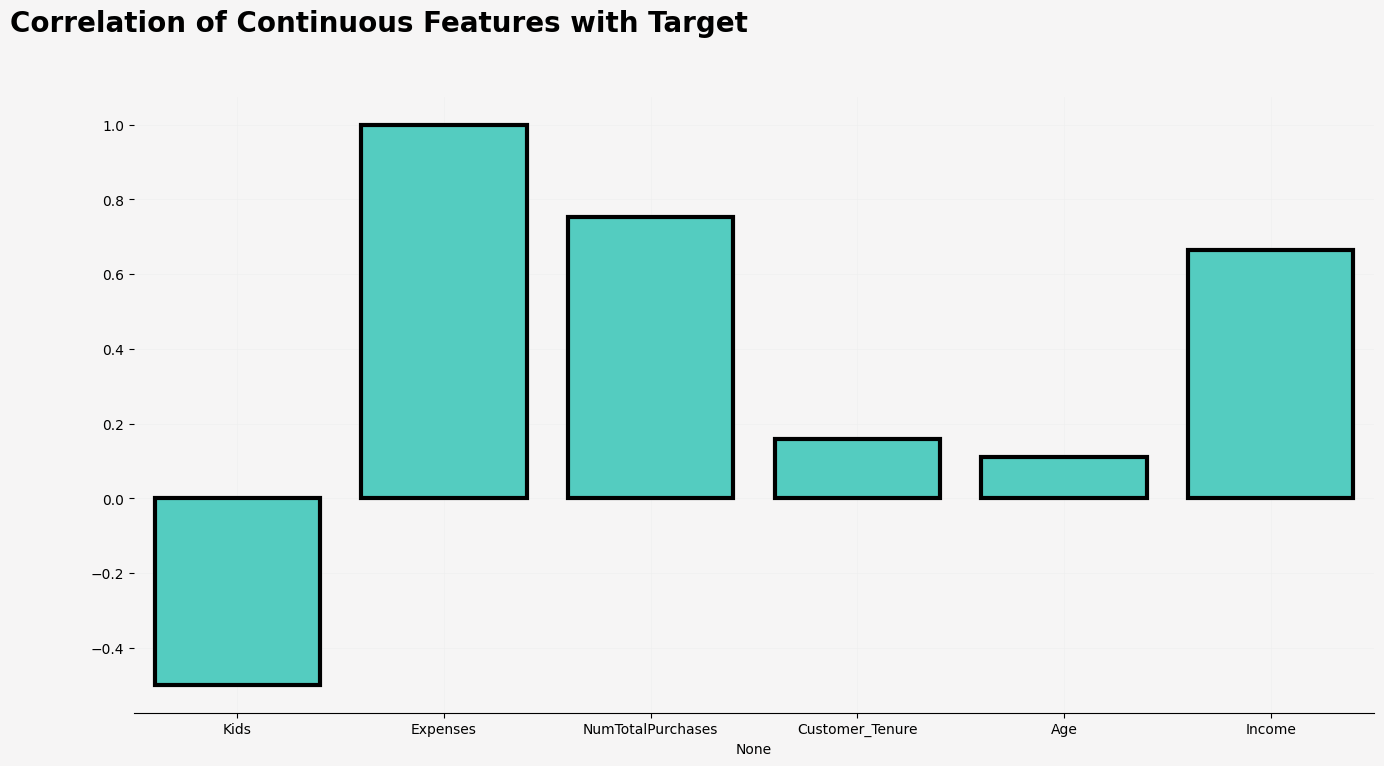

In [ ]:

background_color = "#f6f5f5"

fig = plt.figure(figsize=(16, 8), facecolor=background_color)
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])
colors = ["#2f5586", "#f6f5f5","#2f5586"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

ax0.set_facecolor(background_color)
ax0.text(-1.1, 1.25, 'Correlation of Continuous Features with Target', fontsize=20, fontweight='bold')

chart_df = pd.DataFrame(df_corr.corrwith(df['Expenses']))
chart_df.columns = ['corr']
sns.barplot(x=chart_df.index, y=chart_df['corr'], ax=ax0, color='turquoise', zorder=3, edgecolor='black', linewidth=3)
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.set_ylabel('')

for s in ["top","right", 'left']:
    ax0.spines[s].set_visible(False)

plt.show()

## Key k-means assumptions
Symmetric distribution of variables (not skewed)


Variables with same average values


Variables with same variance




### Identifying skewness
If it has a tail - it's skewed

<div align="center">

| Skewness Range         | Interpretation                                      |
|------------------------|------------------------------------------------------|
| Approximately 0       | Perfectly symmetric.                                |
| -0.5 to 0.5          | Fairly symmetrical.                                  |
| -1 to -0.5 or 0.5 to 1 | Moderately skewed.                                 |
| < -1 or > 1          | Highly skewed; consider a transformation (e.g., logarithmic, square root,...) to reduce skewness. |

</div>


In [205]:
from scipy.stats import skew

skewness_values = data[selected_columns].apply(skew)
print("Skewness of numerical features:\n")
print(skewness_values)

Skewness of numerical features:

kids                 0.415691
Expenses             0.860264
NumTotalPurchases    0.251942
Customer_Tenure     -0.015206
Age                  0.349709
Income               6.741412
dtype: float64


Skewness of numerical features:
Kids                 0.415970
Expenses             0.860841
NumTotalPurchases    0.252111
Customer_Tenure     -0.015216
Age                  0.349944
Income               6.799965
dtype: float64


Visualize the highly skewed variables

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


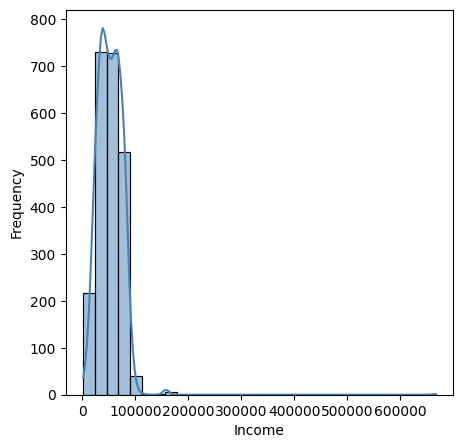

In [172]:
plt.figure(figsize=(5, 5))
sns.histplot(data["Income"], bins=30, kde=True, color="steelblue", edgecolor="black")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

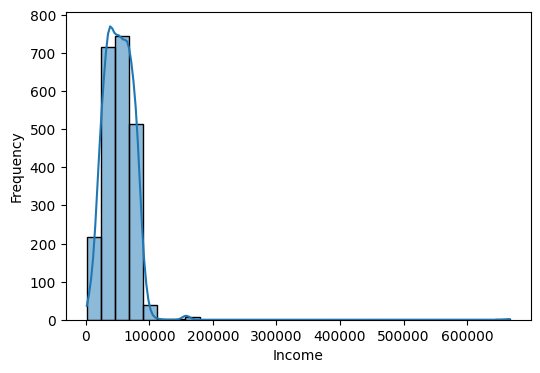

Apply logarithmic transformation on these variables

Use `log1p` to Avoid Handling Zeros

log1p(x) = log(1 + x)

In [206]:
data['Income'] = np.log1p(data["Income"])
s_after_t = ["kids", "Expenses", "NumTotalPurchases", "Customer_Tenure", "Age", "Income"]
skewness_after = data[selected_columns].apply(skew)
print("\nSkewness after log transformation:\n")
print(skewness_after)


Skewness after log transformation:

kids                 0.415691
Expenses             0.860264
NumTotalPurchases    0.251942
Customer_Tenure     -0.015206
Age                  0.349709
Income              -1.161998
dtype: float64


In [ ]:


# Check skewness after log transformation



Skewness of numerical features after log transformation:
Kids                 0.415970
Expenses             0.860841
NumTotalPurchases    0.252111
Customer_Tenure     -0.015216
Age                  0.349944
Income              -1.180276
dtype: float64


Still high. use `QuantileTransformer(output_distribution='normal', random_state=0)` from `sklearn.preprocessing`

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


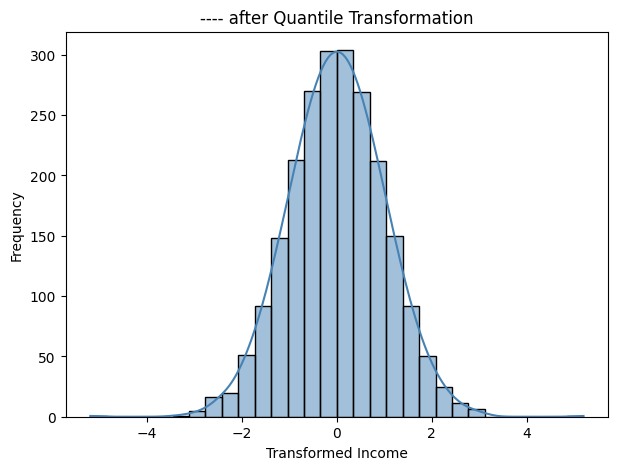

New skewness of 'Income_Transformed': -0.004769495457967024


In [78]:
qt = QuantileTransformer(output_distribution='normal')
data.loc[:, 'Income_Transformed'] = qt.fit_transform(data[['Income']])
new_skewness = skew(data["Income_Transformed"].dropna())  # Supprimer les NaN avant de calculer la skewness
plt.figure(figsize=(7, 5))
sns.histplot(data["Income_Transformed"], bins=30, kde=True, color="steelblue", edgecolor="black")
plt.title("---- after Quantile Transformation")
plt.xlabel("Transformed Income")
plt.ylabel("Frequency")
plt.show()
print(f"New skewness of 'Income_Transformed': {new_skewness}")

<ipython-input-42-51d66c89a52f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['Income'] = qt.fit_transform(df_corr[['Income']])


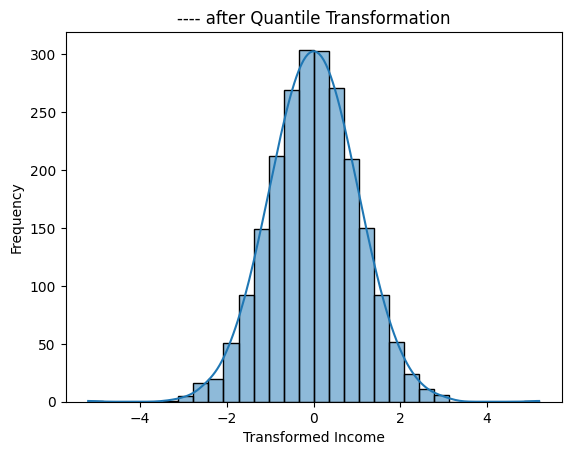

New skewness of '----': -0.0032076794978157575


There is an issue with the scale of some variables
run `df.describe()`

In [47]:
display(data[selected_columns].describe())

,kids,Expenses,NumTotalPurchases,Customer_Tenure,Age,Income
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.950446,605.798214,14.862054,353.582143,56.194196,52208.151875
std,0.751803,602.249288,7.677173,202.122512,11.984069,25111.548264
min,0.000000,5.000000,0.000000,0.000000,29.000000,1730.000000
25%,0.000000,68.750000,8.000000,180.750000,48.000000,35303.000000
50%,1.000000,396.000000,15.000000,355.500000,55.000000,51342.000000
75%,1.000000,1045.500000,21.000000,529.000000,66.000000,68468.250000
max,3.000000,2525.000000,44.000000,699.000000,132.000000,666666.000000


,Kids,Expenses,NumTotalPurchases,Customer_Tenure,Age,Income
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.950446,605.798214,14.862054,353.582143,45.194196,-0.000122
std,0.751803,602.249288,7.677173,202.122512,11.984069,1.008411
min,0.000000,5.000000,0.000000,0.000000,18.000000,-5.199338
25%,0.000000,68.750000,8.000000,180.750000,37.000000,-0.674574
50%,1.000000,396.000000,15.000000,355.500000,44.000000,0.000125
75%,1.000000,1045.500000,21.000000,529.000000,55.000000,0.674189
max,3.000000,2525.000000,44.000000,699.000000,121.000000,5.199338


Fix that to obey to kmeans assumptions

In [48]:
scaler = StandardScaler()
df_scaled_array = scaler.fit_transform(data[selected_columns]) 
df_scaled = pd.DataFrame(df_scaled_array, columns=selected_columns)
df_scaled.describe()

,kids,Expenses,NumTotalPurchases,Customer_Tenure,Age,Income
count,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03
mean,5.392512e-17,3.172066e-17,-1.506731e-17,1.268826e-17,-1.657404e-16,-1.300547e-16
std,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00
min,-1.264505e+00,-9.978133e-01,-1.936308e+00,-1.749736e+00,-2.269702e+00,-2.010606e+00
25%,-1.264505e+00,-8.919365e-01,-8.940252e-01,-8.552770e-01,-6.839101e-01,-6.733526e-01
50%,6.592771e-02,-3.484355e-01,1.797240e-02,9.490706e-03,-9.967091e-02,-3.449988e-02
75%,6.592771e-02,7.302623e-01,7.996846e-01,8.680727e-01,8.184192e-01,6.476593e-01
max,2.726794e+00,3.187435e+00,3.796248e+00,1.709335e+00,6.326960e+00,2.447460e+01


In [ ]:


# Convert the NumPy array back into a DataFrame


# Now you can use .describe() to see the new means and standard deviations
df_scaled.describe()


,Kids,Expenses,NumTotalPurchases,Customer_Tenure,Age,Income
count,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03
mean,4.123686e-17,3.647876e-17,-1.110223e-17,7.930164e-18,-1.681195e-16,1.427430e-17
std,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00
min,-1.264505e+00,-9.978133e-01,-1.936308e+00,-1.749736e+00,-2.269702e+00,-5.157001e+00
25%,-1.264505e+00,-8.919365e-01,-8.940252e-01,-8.552770e-01,-6.839101e-01,-6.689764e-01
50%,6.592771e-02,-3.484355e-01,1.797240e-02,9.490706e-03,-9.967091e-02,2.446569e-04
75%,6.592771e-02,7.302623e-01,7.996846e-01,8.680727e-01,8.184192e-01,6.688359e-01
max,2.726794e+00,3.187435e+00,3.796248e+00,1.709335e+00,6.326960e+00,5.157242e+00


## ELBOW METHOD

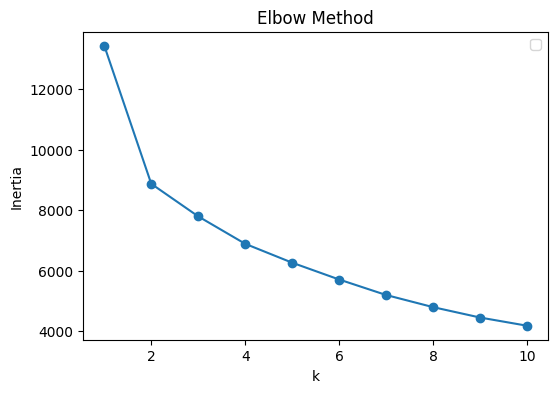

In [49]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.legend()
plt.show()

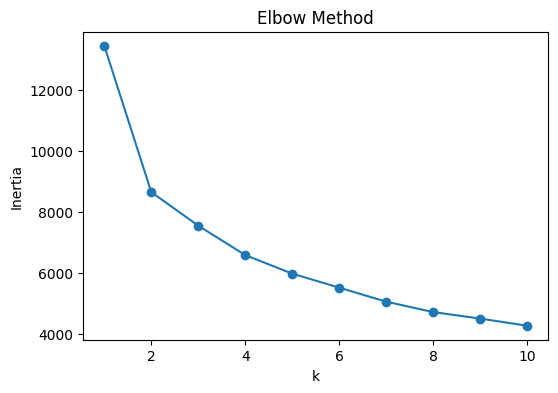

## SILHOUETTE SCORE

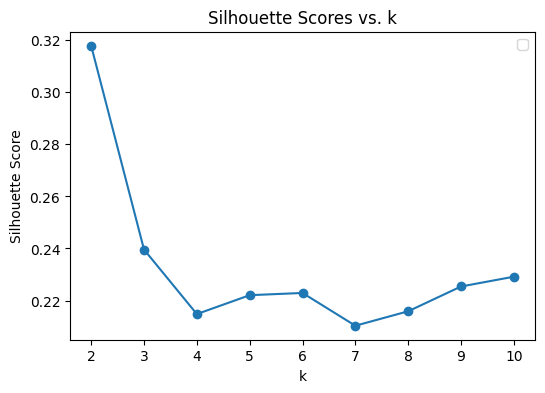

In [50]:
silhouette_scores = []
K_range = range(2, 11)  

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(6, 4))
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores vs. k')
plt.legend()
plt.show()

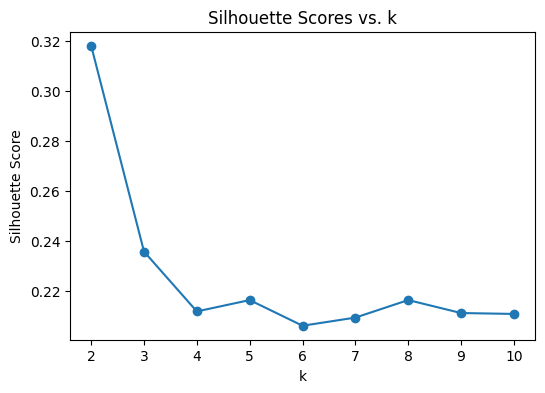

Best k based on Silhouette Score: 2


## APPLY K-MEANS

In [80]:
k_final = best_k  
kmeans_model = KMeans(n_clusters=k_final, random_state=42)
kmeans_model.fit(df_scaled)

data['Cluster'] = kmeans_model.labels_
sample_df = data[['ID', 'Cluster']]

print("=== Sample of ID and Cluster ===")
print(sample_df.head(10))

=== Sample of ID and Cluster ===
       ID  Cluster
0  5524.0        0
1  2174.0        1
2  4141.0        0
3  6182.0        1
4  5324.0        1
5  7446.0        0
6   965.0        0
7  6177.0        1
8  4855.0        1
9  5899.0        1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
k_final = best_k  # or write manually
kmeans_model = KMeans(n_clusters=k_final, random_state=42)
.......


=== Sample of ID and Cluster ===
     ID  Cluster
0  5524        1
1  2174        0
2  4141        1
3  6182        0
4  5324        0
5  7446        1
6   965        1
7  6177        0
8  4855        0
9  5899        0


In [109]:
cluster_sizes = data["Cluster"].value_counts().rename_axis("Cluster").reset_index(name="count")

print("\n=== Cluster Sizes ===\n")
print(cluster_sizes.set_index("Cluster"))


=== Cluster Sizes ===

         count
Cluster       
1         1220
0         1020



=== Cluster Sizes ===
Cluster
0    1225
1    1015
Name: count, dtype: int64


# Interpret cluster composition by income average


In [114]:
income_mean_by_cluster = data.groupby("Cluster")["Income"].mean()

print("\n=== Mean of Features by Cluster ===\n")
print(income_mean_by_cluster)


=== Mean of Features by Cluster ===

Cluster
0    36902.946721
1    70514.377647
Name: Income, dtype: float64



=== Mean of Features by Cluster ===
Cluster
0    37254.026956
1    70342.522178
Name: Income, dtype: float64


### PCA FOR 2D VISUALIZATION


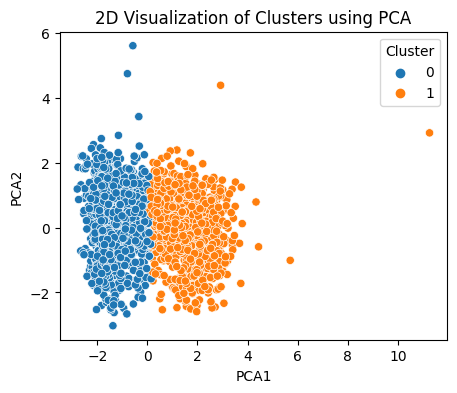

In [129]:
pca = PCA(n_components=2)  # Réduction à 2 dimensions
df_pca = pca.fit_transform(df_scaled)

# 🚀 7. Ajouter les composantes principales au DataFrame
data["PCA1"] = df_pca[:, 0]
data["PCA2"] = df_pca[:, 1]

plt.figure(figsize=(5, 4))
sns.scatterplot(x=data["PCA1"], y=data["PCA2"], hue=data["Cluster"])
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("2D Visualization of Clusters using PCA")
plt.legend(title="Cluster")
plt.show()

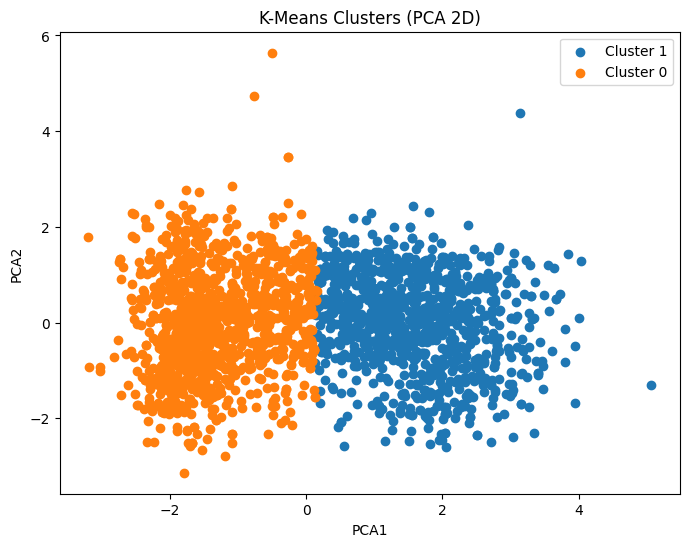

# LABEL CLUSTERS & SAVE RESULTS

    0: 'Low Income',
    1: 'High Income'

In [131]:
cluster_labels_dict = {
    0: 'Low Income',
    1: 'High Income'
}
cluster_labels = {0: "Low Income", 1: "High Income"}

data["Cluster_Label"] = data["Cluster"].map(cluster_labels_dict)

df_results = data[["ID", "Income", "Cluster", "Cluster_Label"]]

print("\n=== Sample of Clustered Data ===\n")
print(df_results.head(10))


=== Sample of Clustered Data ===

       ID   Income  Cluster Cluster_Label
0  5524.0  58138.0        1   High Income
1  2174.0  46344.0        0    Low Income
2  4141.0  71613.0        1   High Income
3  6182.0  26646.0        0    Low Income
4  5324.0  58293.0        0    Low Income
5  7446.0  62513.0        1   High Income
6   965.0  55635.0        1   High Income
7  6177.0  33454.0        0    Low Income
8  4855.0  30351.0        0    Low Income
9  5899.0   5648.0        0    Low Income


In [ ]:
cluster_labels_dict = {
    0: 'Low Income',
    1: 'High Income'
}

........



=== Final dataset saved to 'customers_segmented.csv' ===
